## Observations and Insights 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df=pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID") 
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the DataFrame.
mice_count = len(merge_df["Mouse ID"].unique())
count_mice = pd.DataFrame({
    "Total unique mice" : [mice_count]
})
count_mice

,Total unique mice
0,249


In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Assing to a variable the unique results for the mouse id repeated in the merged df
duplicated_mice = merge_df.loc[merge_df[["Mouse ID", "Timepoint"]].duplicated(),"Mouse ID"].unique()
duplicated_mice_df = pd.DataFrame({
    "Duplicated mice" : duplicated_mice
})
duplicated_mice_df



,Duplicated mice
0,g989


In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
# Cast the array to a list to do comprehension list and extract the info for te duplicated mice
duplicated_mice = duplicated_mice.tolist()
for x in duplicated_mice:
    duplicated_mice_info = merge_df.loc[merge_df["Mouse ID"]==x]
duplicated_mice_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"].isin(duplicate_mice) == False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [62]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_df["Mouse ID"].unique())
clean_count_mice_df = pd.DataFrame({
    "Total unique clean mice" : [clean_mice_count]
})
clean_count_mice_df

,Total unique clean mice
0,248


## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Create a df with the envolved fields
for_summary=clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

#Calculate each indicator for each drug regimen grouping by this field
mean=for_summary.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=for_summary.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=for_summary.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd=for_summary.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=for_summary.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

#Build DF
analysis_df=pd.DataFrame({
    "MEAN":mean,
    "MEDIAN":median,
    "VARIANCE":variance, 
    "SD": sd, 
    "SEM": sem
    })
analysis_df


,MEAN,MEDIAN,VARIANCE,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

<AxesSubplot:title={'center':'Mice per treatment'}, xlabel='Drug Regimen', ylabel='Mice'>

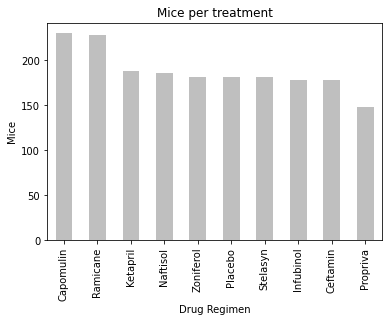

In [188]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
drug_counts=clean_df["Drug Regimen"].value_counts()
y_axis=drug_counts.values
x_axis=drug_counts.index
# #Generate plot using pandas
drug_counts.plot(kind="bar", facecolor='gray', alpha=.5, ylabel="Mice", xlabel="Drug Regimen", title="Mice per treatment")

# #Alternative unsolved
# drug_counts=clean_df.groupby("Timepoint")
# drug_counts = drug_counts["Drug Regimen"].value_counts()
# print(drug_counts)
# drug_counts.plot(kind="bar", figsize=(25,5), ylabel="Mice", xlabel="Drug Regimen per Tiempoint", title="Mice per treatment")

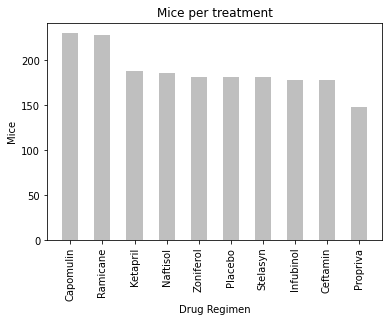

In [189]:
#Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
y_axis=drug_counts.values
x_axis=drug_counts.index

plt.bar(x_axis, y_axis, color='gray', alpha=0.5, align= "center", width=.5)
plt.ylabel("Mice")
plt.xlabel("Drug Regimen")
plt.title("Mice per treatment")
plt.xticks(rotation=90)
plt.show()




,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


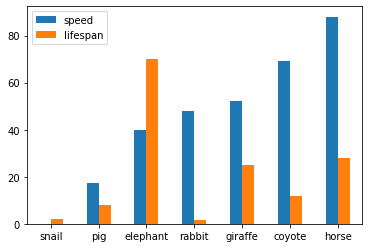

In [100]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
                
ax = df.plot.bar(rot=0)
df

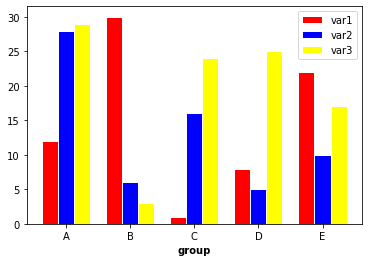

In [165]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='yellow', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


## Pie Plots

<AxesSubplot:title={'center':'Gender Distribution'}, ylabel='Sex'>

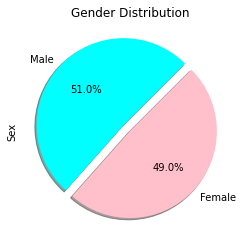

In [246]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Calculate the count oof each gender
gender_count=clean_df["Sex"].value_counts()

gender_count.plot.pie(title="Gender Distribution",explode=[0.1,0], colors=["aqua", "pink"], autopct="%1.1f%%", shadow=True, startangle=45)

Text(0.5, 1.0, 'Gender distribution')

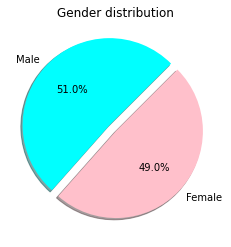

In [247]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Create pie chart setting the parameters
labels=gender_count.index
plt.pie(gender_count, explode=[0.1,0], labels=labels, autopct='%1.1f%%', shadow=True, startangle=45, colors=["aqua", "pink"])
plt.title("Gender distribution")

## Quartiles, Outliers and Boxplots

<AxesSubplot:>

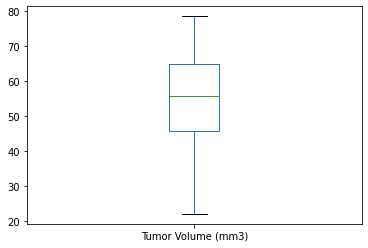

In [254]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_tumor=clean_df.groupby("Mouse ID").max().reset_index()
final_tumors_df=final_tumor[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')
final_tumors_df


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumors_df["Tumor Volume (mm3)"].plot.box()


## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
